In [29]:
# Import the packages
import warnings
warnings.filterwarnings('ignore')
from ml_utils import *

Shape: (205, 26)
-----------------
car_ID --> Type:num | Nas: 0(0%) | Min-Max: (1)-(205) | Possible PK
symboling --> Type:cat | Nas: 0(0%) | Categories: 6
CarName --> Type:cat | Nas: 0(0%) | Categories: 147
fueltype --> Type:cat | Nas: 0(0%) | Categories: 2
aspiration --> Type:cat | Nas: 0(0%) | Categories: 2
doornumber --> Type:cat | Nas: 0(0%) | Categories: 2
carbody --> Type:cat | Nas: 0(0%) | Categories: 5
drivewheel --> Type:cat | Nas: 0(0%) | Categories: 3
enginelocation --> Type:cat | Nas: 0(0%) | Categories: 2
wheelbase --> Type:num | Nas: 0(0%) | Min-Max: (86)-(120)
carlength --> Type:num | Nas: 0(0%) | Min-Max: (141)-(208)
carwidth --> Type:num | Nas: 0(0%) | Min-Max: (60)-(72)
carheight --> Type:num | Nas: 0(0%) | Min-Max: (47)-(59)
curbweight --> Type:num | Nas: 0(0%) | Min-Max: (1488)-(4066)
enginetype --> Type:cat | Nas: 0(0%) | Categories: 7
cylindernumber --> Type:cat | Nas: 0(0%) | Categories: 7
enginesize --> Type:num | Nas: 0(0%) | Min-Max: (61)-(326)
fuelsystem --> 

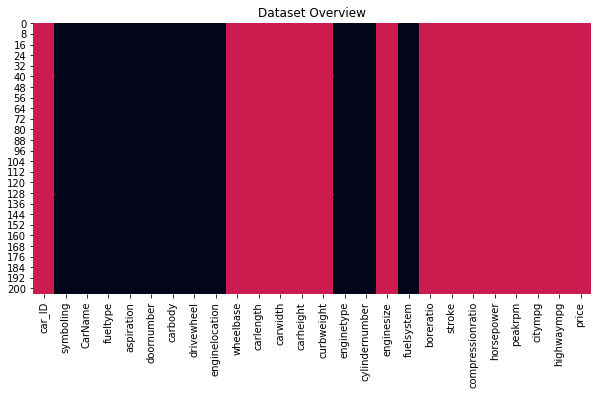

 Categerocial   Numerical   NaN 


In [30]:
#Import the data
df = pd.read_csv('CarPrice_Assignment.csv')
dtf_overview(df, max_cat=20, figsize=(10,5))

In [31]:
df= df.set_index('car_ID')
df = df.rename(columns={'price': 'Y'})

In [32]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Y'],
      dtype='object')

# Data analysis

In [33]:
#Group variables by type
#pk : car_ID
# y : price
# engine info: fueltype, enginelocation, enginetype, enginesize, fuelsystem, stroke, horsepower
# speed : peakrpm, citympg, highwaympg
# size : doornumber,carbody, drivewheel,  carlength, carwidth, carheight, curbweight
# general : symboling, car_Name


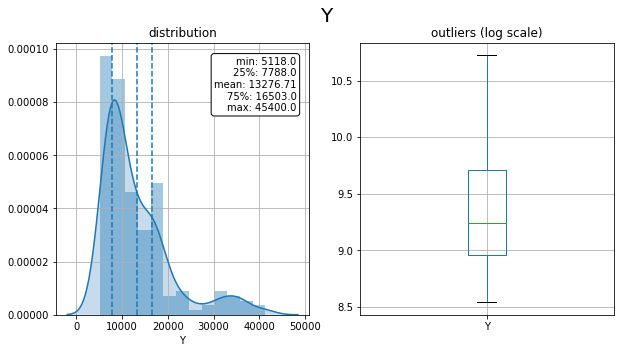

In [34]:
#Target Variable
freqdist_plot(df, 'Y', box_logscale=True, figsize=(10,5))

In [35]:
# Average car price : 13276.1

--- WARNING: Factorizing 147 labels of CarName ---
--- WARNING: Factorizing 2 labels of fueltype ---
--- WARNING: Factorizing 2 labels of aspiration ---
--- WARNING: Factorizing 2 labels of doornumber ---
--- WARNING: Factorizing 5 labels of carbody ---
--- WARNING: Factorizing 3 labels of drivewheel ---
--- WARNING: Factorizing 2 labels of enginelocation ---
--- WARNING: Factorizing 7 labels of enginetype ---
--- WARNING: Factorizing 7 labels of cylindernumber ---
--- WARNING: Factorizing 8 labels of fuelsystem ---


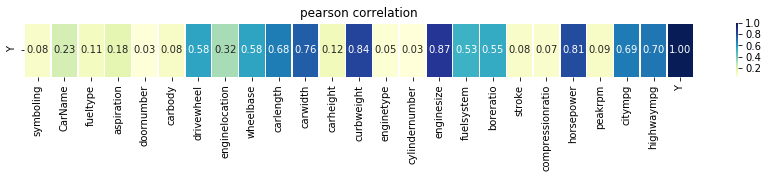

In [36]:
corr = corr_matrix(df, method='pearson', negative=False, lst_filters=['Y'], figsize=(15,1))

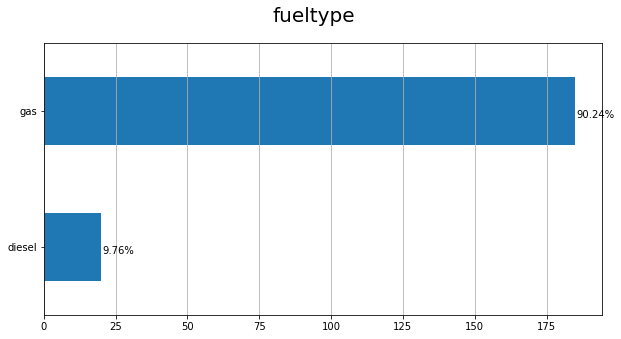

In [37]:
freqdist_plot(df, 'fueltype', figsize=(10,5))

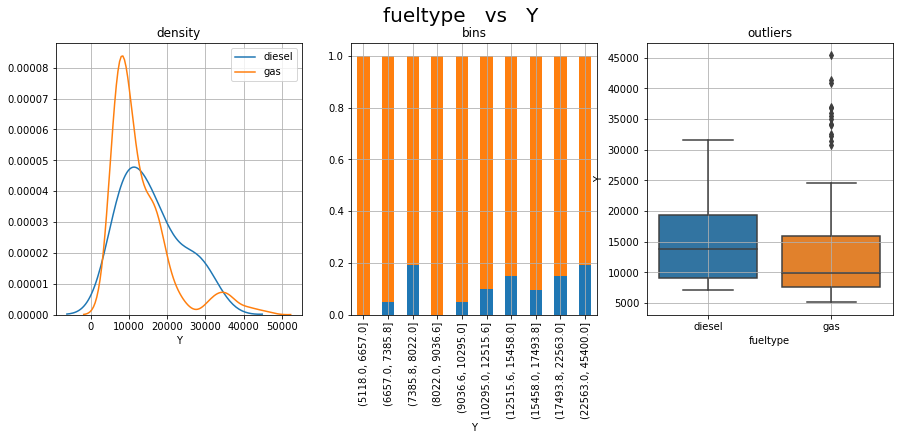

In [38]:
bivariate_plot(df, x='fueltype', y = 'Y', figsize=(15,5))

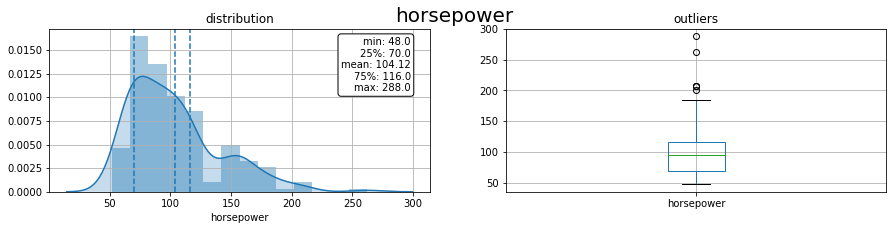

In [39]:
freqdist_plot(df, 'horsepower', figsize=(15,3))

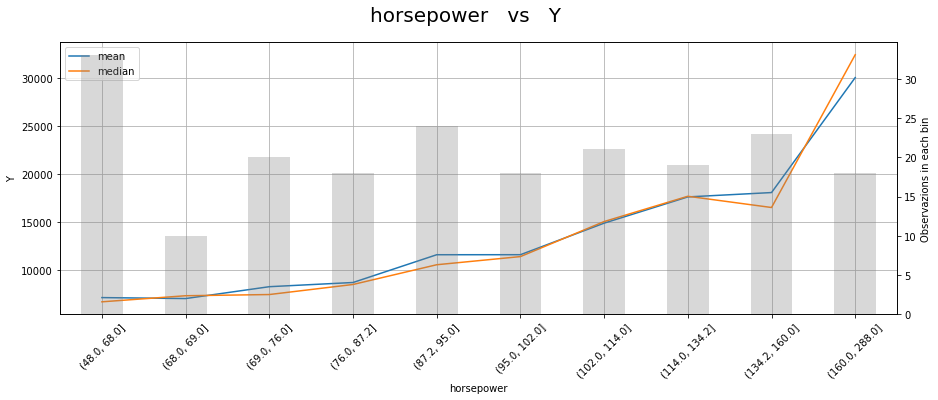

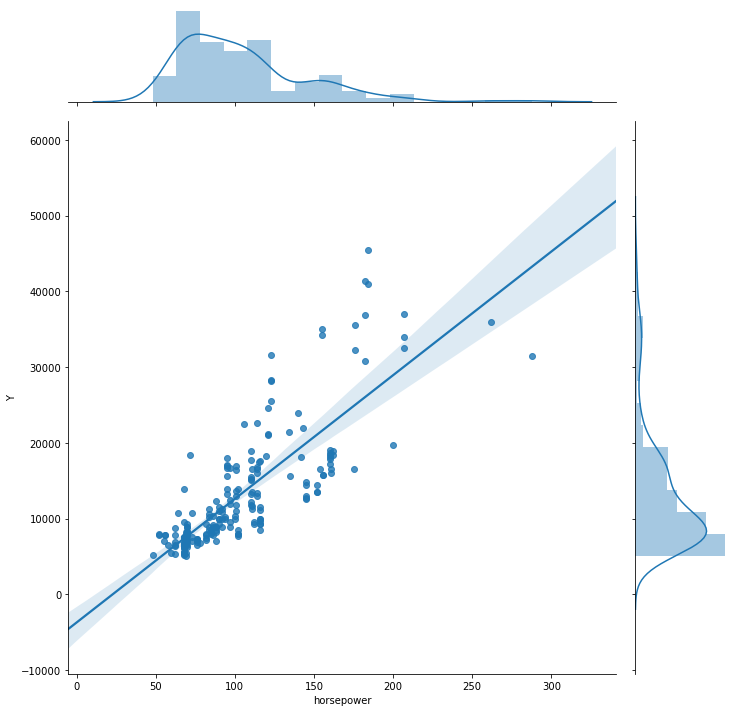

In [40]:
bivariate_plot(df, x='horsepower', y = 'Y', figsize=(15,5))

In [41]:
#Horsepower ispredictive: The bigger it is, the higher the price is

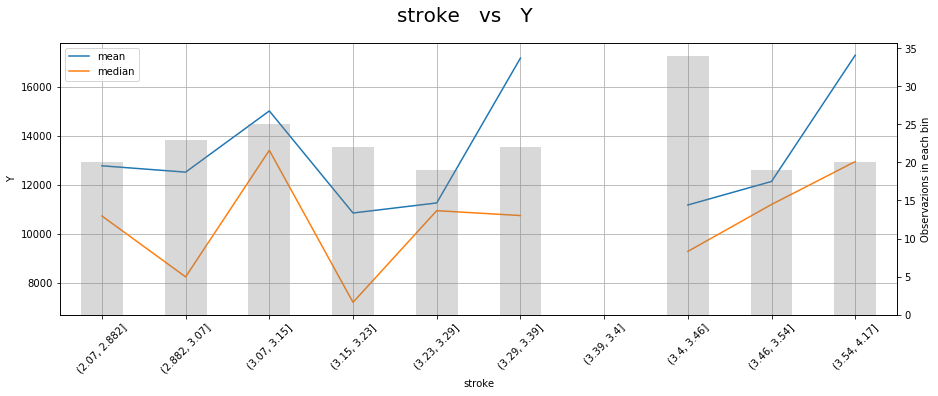

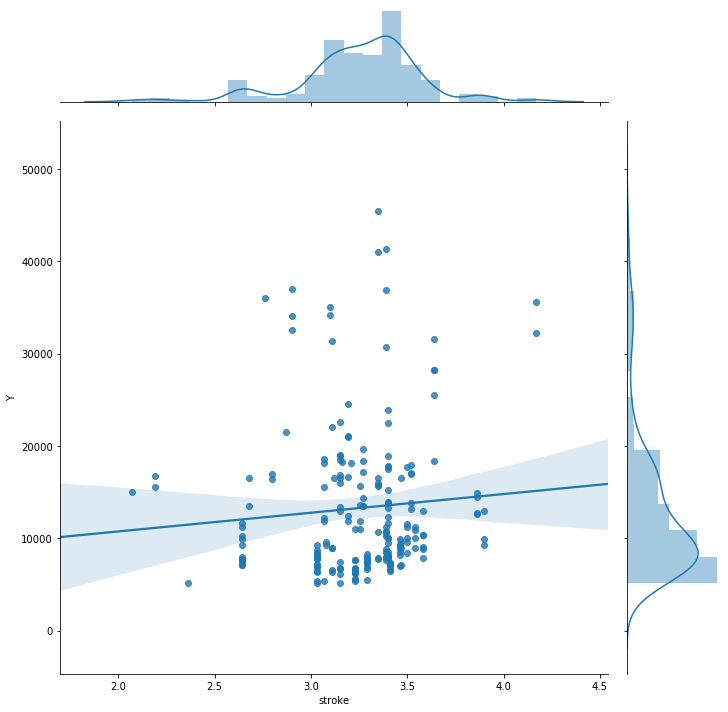

In [42]:
bivariate_plot(df, x='stroke', y = 'Y', figsize=(15,5))

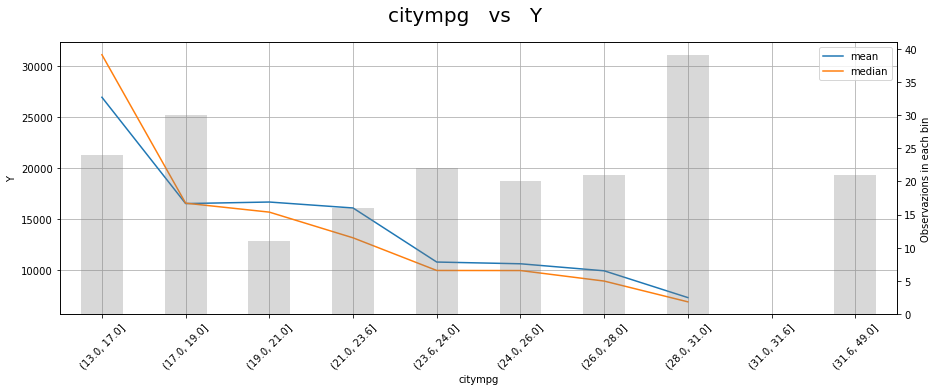

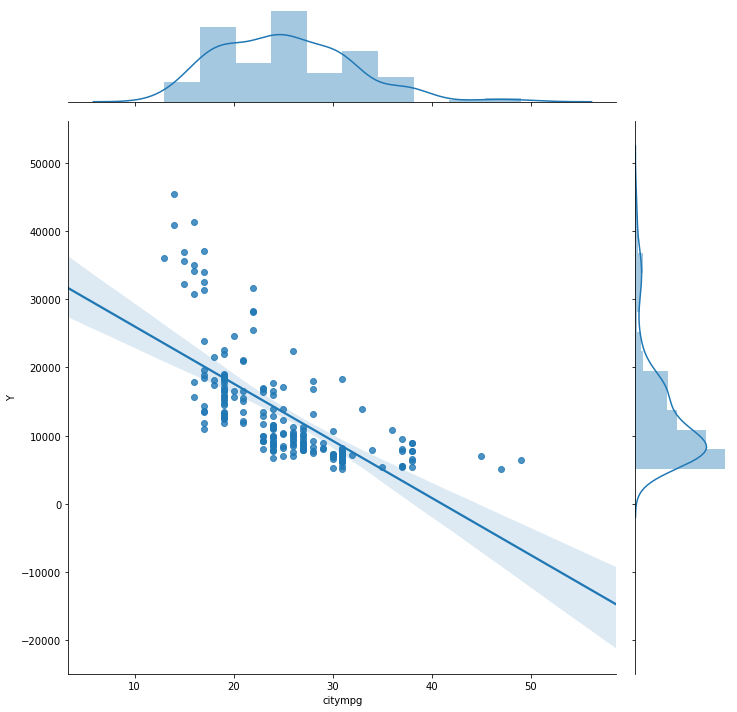

In [43]:
bivariate_plot(df, x='citympg', y = 'Y', figsize=(15,5))

In [44]:
#citympg is predictive

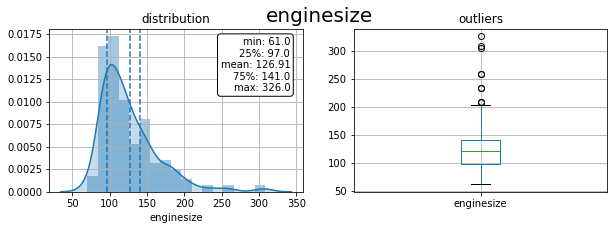

In [45]:
freqdist_plot(df, 'enginesize', figsize=(10,3))

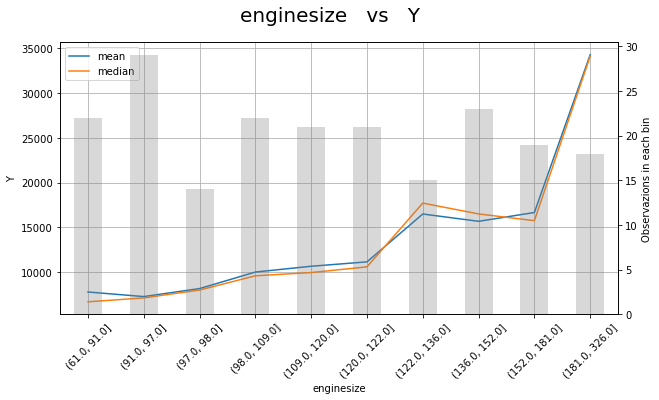

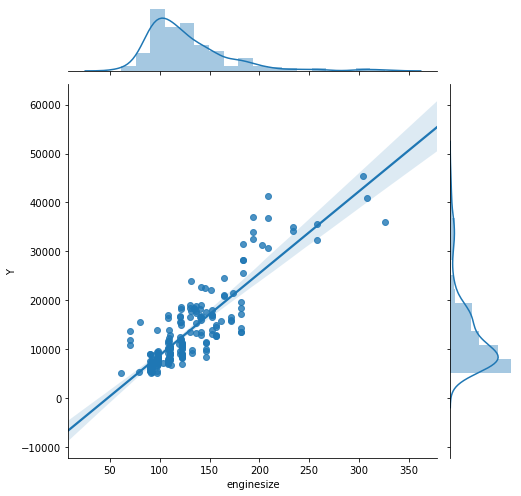

In [46]:
bivariate_plot(df, x='enginesize', y='Y')

In [47]:
#Engine size is predictive too

In [69]:
freqdist_plot(df, x='highwaympg', figsize=(15,3))

In [71]:
bivariate_plot(df, x='highwaympg', y='Y', figsize=(15,3))

--- model used ---
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=16, verbose=0, warm_start=False)


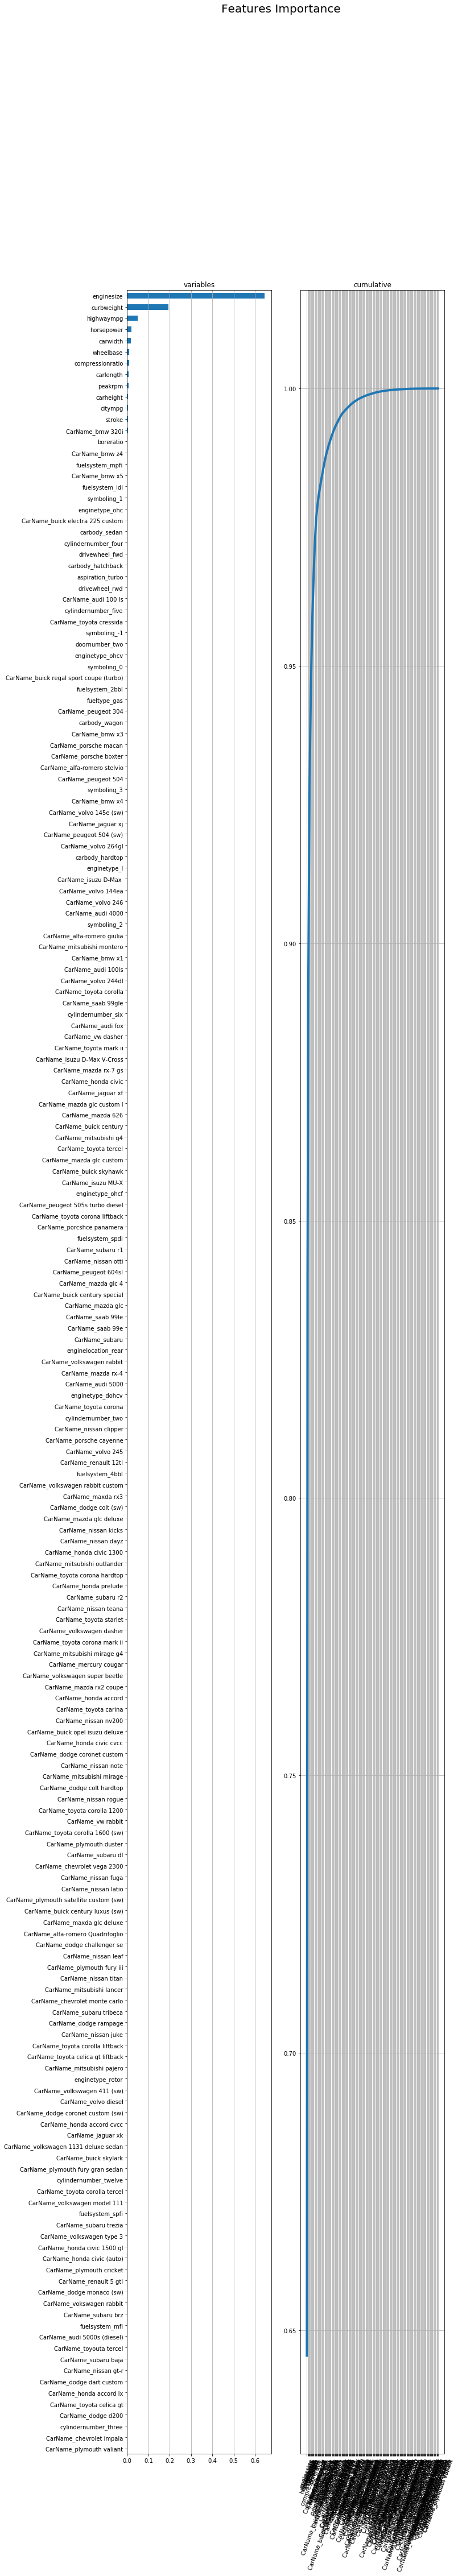

In [65]:
#importance
model= ensemble.RandomForestRegressor(n_estimators=100, criterion='mse', random_state=16)
feat_imp = features_importance(X=df_train.drop('Y', axis=1).values, y=df_train['Y'].values, 
                              X_names=df_train.drop('Y', axis=1).columns.to_list(),
                              model=model, task='regression', figsize=(10,70))

In [ ]:
# So the most important ones are the enginesize, curbweight, highwaympg...

In [66]:
X_names= ['enginesize', 'curbweight', 'highwaympg', 'horsepower', 'carwidth', 'wheelbase']

In [67]:
df_good = df[X_names + ['Y']]
df_good.head()

enginesize  curbweight  highwaympg  horsepower  carwidth  wheelbase  \
car_ID                                                                        
1              130        2548          27         111      64.1       88.6   
2              130        2548          27         111      64.1       88.6   
3              152        2823          26         154      65.5       94.5   
4              109        2337          30         102      66.2       99.8   
5              136        2824          22         115      66.4       99.4   

              Y  
car_ID           
1       13495.0  
2       16500.0  
3       16500.0  
4       13950.0  
5       17450.0

In [68]:
df_good.to_csv('cars.csv', index=False)

In [24]:
df_train, df_test = dtf_partitioning(df, y='Y', test_size=0.2, shuffle=False)

X_train shape: (164, 24) | X_test shape: (41, 24)
y_train mean: 13358.27 | y_test mean: 12950.46
25 features: ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [25]:
df.head()

symboling                   CarName fueltype aspiration doornumber  \
car_ID                                                                       
1               3        alfa-romero giulia      gas        std        two   
2               3       alfa-romero stelvio      gas        std        two   
3               1  alfa-romero Quadrifoglio      gas        std        two   
4               2               audi 100 ls      gas        std       four   
5               2                audi 100ls      gas        std       four   

            carbody drivewheel enginelocation  wheelbase  carlength  ...  \
car_ID                                                               ...   
1       convertible        rwd          front       88.6      168.8  ...   
2       convertible        rwd          front       88.6      168.8  ...   
3         hatchback        rwd          front       94.5      171.2  ...   
4             sedan        fwd          front       99.8      176.6  ...   
5             sedan        4wd          front       99.4      176.6  ...   

        enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
car_ID                                                                          
1              130        mpfi       3.47   2.68              9.0         111   
2              130        mpfi       3.47   2.68              9.0         111   
3              152        mpfi       2.68   3.47              9.0         154   
4              109        mpfi       3.19   3.40             10.0         102   
5              136        mpfi       3.19   3.40              8.0         115   

       peakrpm  citympg  highwaympg        Y  
car_ID                                        
1         5000       21          27  13495.0  
2         5000       21          27  16500.0  
3         5000       19          26  16500.0  
4         5500       24          30  13950.0  
5         5500       18          22  17450.0  

[5 rows x 25 columns]

In [26]:
df_train = add_dummies(df_train, x=['CarName', 'fueltype'], dropx=True)

TypeError: 'in <string>' requires string as left operand, not list